In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/prediction.csv")

In [3]:
df

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,Relevant Text,gender,equality,women,education,girls,...,gap,rights,female,schooling,educational,Years with Highest Keyword Count,Years with Most Positive Sentiment,Parity_Indicator_Code,Country Code,Parity_Value
0,AFG,1971,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Primary,AFG,0.165
1,AFG,1971,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Secondary,AFG,0.146
2,AFG,1972,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Primary,AFG,0.168
3,AFG,1972,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Secondary,AFG,0.132
4,AFG,1972,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Tertiary,AFG,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16894,ZWE,2019,6,0.125,Embedded in our aspirations is a strong sense ...,0.000000,0.0,0.028102,0.164138,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2022],[2021],Primary,ZWE,0.999
16895,ZWE,2019,6,0.125,Embedded in our aspirations is a strong sense ...,0.000000,0.0,0.028102,0.164138,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2022],[2021],Tertiary,ZWE,0.961
16896,ZWE,2020,5,0.142,"Your Excellencies, As we celebrate the 25th An...",0.118654,0.0,0.177635,0.000000,0.071262,...,0.0,0.053283,0.0,0.0,0.0,[2022],[2021],Primary,ZWE,1.005
16897,ZWE,2020,5,0.142,"Your Excellencies, As we celebrate the 25th An...",0.118654,0.0,0.177635,0.000000,0.071262,...,0.0,0.053283,0.0,0.0,0.0,[2022],[2021],Tertiary,ZWE,0.962


In [4]:
df["Parity_Indicator_Code"].value_counts()

Parity_Indicator_Code
Primary      6660
Secondary    5390
Tertiary     4849
Name: count, dtype: int64

In [5]:
# tertiary data is quite sparse
df[df["Parity_Indicator_Code"] == "Tertiary"][["ISO-alpha3 Code", "Year"]].value_counts("Year").sort_values(ascending=True)

Year
2023      7
1970     13
1997     63
1981     67
1989     67
1973     68
1976     68
1988     68
1990     69
1991     70
1975     71
1978     71
1985     71
1974     72
2022     73
1982     73
1998     74
1992     74
1984     74
1983     74
1977     74
1986     75
1987     75
1979     76
1971     76
1972     78
1995     78
1980     79
1993     79
1996     80
1994     80
2000     98
2001     99
2007    103
1999    104
2005    107
2003    111
2008    111
2006    111
2021    112
2004    113
2002    114
2009    118
2010    120
2013    124
2019    125
2020    125
2014    126
2011    127
2012    130
2017    131
2018    132
2016    133
2015    138
Name: count, dtype: int64

In [6]:
primary_df = df[df["Parity_Indicator_Code"] == "Primary"]

In [7]:
primary_df.reset_index(drop=True, inplace=True)
primary_df.value_counts("Year").sort_values(ascending=True)

Year
2022      4
1970     17
2021     66
1973     91
1971     92
1975     95
1972    100
1974    100
1976    106
1985    106
1980    107
1979    108
1990    110
1989    111
1997    111
1977    111
1982    111
1981    112
1987    112
1988    113
1983    114
1984    114
1978    114
1986    120
1996    124
1991    126
1992    130
1995    130
1998    131
2020    134
1993    134
1994    135
2000    145
2019    149
2003    151
2010    151
2001    153
2018    153
1999    154
2006    154
2013    154
2005    156
2009    157
2004    157
2002    158
2008    158
2014    159
2016    159
2017    159
2015    160
2007    161
2011    161
2012    162
Name: count, dtype: int64

In [8]:
# drop columns based on no relevancy or potential future information -> at point of prediction, take 1990, the model shouldnt and cant know that 2017 was the highest sentiment score
primary_df = primary_df.drop(columns=["Relevant Text", "Years with Highest Keyword Count", "Years with Most Positive Sentiment", "Parity_Indicator_Code", "Country Code"])

In [9]:
# drop years 1970, 2021 and 2022 as only few data points are available
primary_df[~primary_df["Year"].isin([1970, 2021, 2022])]

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,parity,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value
0,AFG,1971,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.165
1,AFG,1972,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.168
2,AFG,1973,1,0.273,0.000000,0.000000,0.099189,0.000000,0.000000,0.212404,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.176
3,AFG,1974,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.175
4,AFG,1975,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6654,ZWE,2016,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.983
6655,ZWE,2017,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.992
6656,ZWE,2018,3,0.102,0.094684,0.099719,0.056700,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.997
6657,ZWE,2019,6,0.125,0.000000,0.000000,0.028102,0.164138,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.999


In [10]:
countries = pd.DataFrame(data={"ISO-alpha3 Code": primary_df["ISO-alpha3 Code"].unique()})

In [11]:
df_base_year = pd.DataFrame(data={"Year": np.arange(1971, 2021)})

In [12]:
cross = pd.merge(countries, df_base_year, how="cross")
cross

,ISO-alpha3 Code,Year
0,AFG,1971
1,AFG,1972
2,AFG,1973
3,AFG,1974
4,AFG,1975
...,...,...
9545,ZWE,2016
9546,ZWE,2017
9547,ZWE,2018
9548,ZWE,2019


In [13]:
# add missing years for all countries
all_years = pd.merge(cross, primary_df, on=["Year", "ISO-alpha3 Code"], how="left")

In [14]:
# noticed that some years are missing -> checked by creating dataframe with all combinations of years and countries and left joining that to the original (primary_df) dataframe to check for na ues
nas = all_years[all_years["Keyword Count"].isna()]["ISO-alpha3 Code"].value_counts()

In [15]:
na_list = list(nas[nas > 10].index)

In [16]:
len(na_list)

106

In [17]:
all_years[all_years["ISO-alpha3 Code"] == "DEU"]

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,parity,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value
2100,DEU,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,DEU,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,DEU,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2103,DEU,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2104,DEU,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105,DEU,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,DEU,1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2107,DEU,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108,DEU,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109,DEU,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Sort the dataframe by 'ISO-alpha3 Code' and 'Year'
all_years = all_years.sort_values(by=['ISO-alpha3 Code', 'Year'])
all_years

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,parity,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value
0,AFG,1971,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.165
1,AFG,1972,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.168
2,AFG,1973,1.0,0.273,0.000000,0.000000,0.099189,0.000000,0.000000,0.212404,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.176
3,AFG,1974,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.175
4,AFG,1975,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,ZWE,2016,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.983
9546,ZWE,2017,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.992
9547,ZWE,2018,3.0,0.102,0.094684,0.099719,0.056700,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.997
9548,ZWE,2019,6.0,0.125,0.000000,0.000000,0.028102,0.164138,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.999


In [19]:
all_years['Parity_Change'] = all_years.groupby('ISO-alpha3 Code')['Parity_Value'].diff()
all_years.dropna(subset=['Parity_Change'], inplace=True)
all_years = all_years.reset_index(drop=True)

In [20]:
x = all_years.drop(columns=["Parity_Change", "Parity_Value"])
x

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,access,parity,balance,equity,discrimination,gap,rights,female,schooling,educational
0,AFG,1972,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,AFG,1973,1.0,0.273,0.000000,0.000000,0.099189,0.000000,0.000000,0.212404,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,AFG,1974,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,AFG,1975,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,AFG,1976,2.0,0.177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102,0.0,0.0,0.000000,0.0,0.117326,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,ZWE,2016,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
5885,ZWE,2017,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
5886,ZWE,2018,3.0,0.102,0.094684,0.099719,0.056700,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
5887,ZWE,2019,6.0,0.125,0.000000,0.000000,0.028102,0.164138,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [21]:
y_change = all_years["Parity_Change"]

In [22]:
y_val = all_years["Parity_Change"]

In [23]:
y_val

0       0.003
1       0.008
2      -0.001
3       0.008
4       0.006
        ...  
5884    0.003
5885    0.009
5886    0.005
5887    0.002
5888    0.006
Name: Parity_Change, Length: 5889, dtype: float64

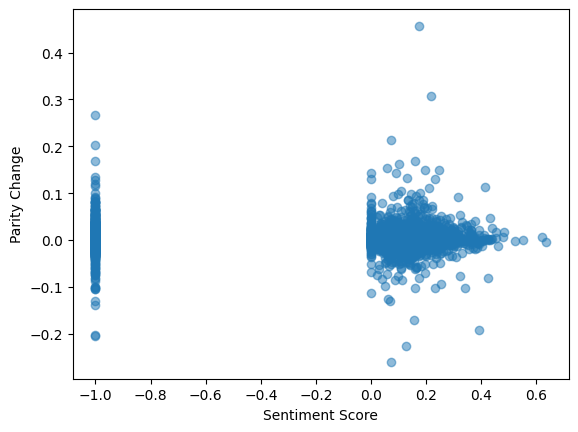

In [24]:
plt.scatter(x["Sentiment Score"], y_change, alpha=0.5)
plt.xlabel("Sentiment Score")
plt.ylabel("Parity Change")
plt.show()

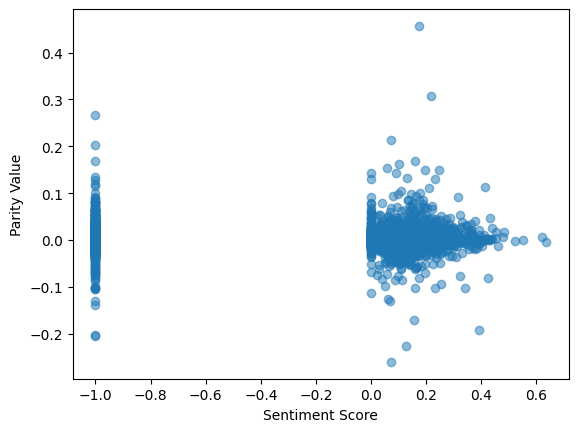

In [25]:
plt.scatter(x["Sentiment Score"], y_val, alpha=0.5)
plt.xlabel("Sentiment Score")
plt.ylabel("Parity Value")
plt.show()

In [42]:
x_test = all_years[all_years["Year"] >= 2015].drop(["Parity_Change", "Parity_Value"], axis=1)
x_test.reset_index(drop=True, inplace=True)
x_train = all_years[all_years["Year"] < 2015].drop(["Parity_Change", "Parity_Value"], axis=1)
x_train.reset_index(drop=True, inplace=True)

In [43]:
y_test_val = all_years[all_years["Year"] >= 2015]["Parity_Value"]
y_test_val.reset_index(drop=True, inplace=True)
y_train_val = all_years[all_years["Year"] < 2015]["Parity_Value"]
y_train_val.reset_index(drop=True, inplace=True)

y_test_change = all_years[all_years["Year"] >= 2015]["Parity_Change"]
y_test_change.reset_index(drop=True, inplace=True)
y_train_change = all_years[all_years["Year"] < 2015]["Parity_Change"]
y_train_change.reset_index(drop=True, inplace=True)

y_test_changecat = y_test_change.apply(lambda x: 2 if x > 0 else (1 if x == 0 else 0))
y_test_changecat.reset_index(drop=True, inplace=True)
y_train_changecat = y_train_change.apply(lambda x: 2 if x > 0 else (1 if x == 0 else 0))
y_train_changecat.reset_index(drop=True, inplace=True)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder


# One Hot Encoding for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_train = encoder.fit_transform(x_train[['ISO-alpha3 Code']]).toarray()
encoded_test = encoder.transform(x_test[['ISO-alpha3 Code']]).toarray()

# Convert encoded features to DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['ISO-alpha3 Code']))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['ISO-alpha3 Code']))

# Drop original categorical column and concatenate encoded columns
x_train = x_train.drop(columns=['ISO-alpha3 Code']).reset_index(drop=True)
x_test = x_test.drop(columns=['ISO-alpha3 Code']).reset_index(drop=True)
x_train = pd.concat([x_train, encoded_train_df], axis=1)
x_test = pd.concat([x_test, encoded_test_df], axis=1)


# classification

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train_changecat)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train_changecat)

# Predict using Logistic Regression
y_pred_log_reg = log_reg.predict(x_test)

# Predict using Naive Bayes
y_pred_nb = nb.predict(x_test)

# Evaluate performance
accuracy_log_reg = accuracy_score(y_test_changecat, y_pred_log_reg)
accuracy_nb = accuracy_score(y_test_changecat, y_pred_nb)

print(f"Accuracy for Logistic Regression: {accuracy_log_reg}")
print(f"Accuracy for Naive Bayes: {accuracy_nb}")

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_changecat, y_pred_log_reg))

print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test_changecat, y_pred_nb))

Accuracy for Logistic Regression: 0.4831591173054588
Accuracy for Naive Bayes: 0.2218350754936121

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.38      0.31      0.34       326
           1       0.00      0.00      0.00        76
           2       0.53      0.69      0.60       459

    accuracy                           0.48       861
   macro avg       0.30      0.33      0.31       861
weighted avg       0.43      0.48      0.45       861


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.45      0.20      0.28       326
           1       0.09      0.70      0.16        76
           2       0.50      0.16      0.24       459

    accuracy                           0.22       861
   macro avg       0.35      0.35      0.23       861
weighted avg       0.45      0.22      0.25       861



c:\Users\Jan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [1000]
}

# Parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create Logistic Regression model
log_reg = LogisticRegression()

# Create Naive Bayes model
nb = GaussianNB()

# GridSearch for Logistic Regression
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', verbose=1)
grid_log_reg.fit(x_train, y_train_changecat)

# GridSearch for Naive Bayes
grid_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', verbose=1)
grid_nb.fit(x_train, y_train_changecat)

# Best parameters and scores for Logistic Regression
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best score for Logistic Regression:", grid_log_reg.best_score_)

# Best parameters and scores for Naive Bayes
print("Best parameters for Naive Bayes:", grid_nb.best_params_)
print("Best score for Naive Bayes:", grid_nb.best_score_)

# Predict on test set using the best Logistic Regression model
y_pred_log_reg = grid_log_reg.best_estimator_.predict(x_test)

# Predict on test set using the best Naive Bayes model
y_pred_nb = grid_nb.best_estimator_.predict(x_test)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_train_changecat, y_pred_log_reg)
print(f"Test Accuracy for Logistic Regression: {accuracy_log_reg}")
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_change, y_pred_log_reg))

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_train_changecat, y_pred_nb)
print(f"Test Accuracy for Naive Bayes: {accuracy_nb}")
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test_change, y_pred_nb))


Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\Jan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Jan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'C': 0.001, 'max_iter': 1000, 'solver': 'newton-cg'}
Best score for Logistic Regression: 0.5719968744745458
Best parameters for Naive Bayes: {'var_smoothing': 1e-08}
Best score for Naive Bayes: 0.07279190528470966


ValueError: Found input variables with inconsistent numbers of samples: [5028, 861]

## Grid Search an Training for data with Parity Change ##

In [43]:
# Train Linear Regression
linear_reg_change = LinearRegression()
#linear_reg_change.fit(x_train, y_train_change)

# Train Decision Tree Regressor
tree_reg_change = DecisionTreeRegressor()
#tree_reg_change.fit(x_train, y_train_change)

# Train Random Forest Regressor
forest_reg_change = RandomForestRegressor()
#forest_reg_change.fit(x_train, y_train_change)

In [52]:
### Parameter Grid

# Linear Regression 
linear_reg_params = {
    'fit_intercept': [True, False],
}

# Decision Tree Regressor
tree_reg_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Random Forest Regressor
forest_reg_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

In [47]:
# GridSearchCV for Linear Regression
grid_search_linear = GridSearchCV(estimator=linear_reg_change, param_grid=linear_reg_params, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(x_train, y_train_change)

print("\nBest parameters for Linear Regression:", grid_search_linear.best_params_)
print("Best score for Linear Regression:", grid_search_linear.best_score_)


Best parameters for Linear Regression: {'fit_intercept': False}
Best score for Linear Regression: -0.03805919605506869


In [48]:
# GridSearch for Decision Tree Regressor
grid_search_tree = GridSearchCV(estimator=tree_reg_change, param_grid=tree_reg_params, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(x_train, y_train_change)

print("\nBest parameters for Decision Tree Regressor:", grid_search_tree.best_params_)
print("Best score for Decision Tree Regressor:", grid_search_tree.best_score_)


Best parameters for Decision Tree Regressor: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score for Decision Tree Regressor: -0.0005179179253194274


In [53]:
grid_search_forest = GridSearchCV(estimator=forest_reg_change, param_grid=forest_reg_params, cv=5, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train_change)

print("\nBest parameters for Random Forest Regressor:", grid_search_forest.best_params_)
print("Best score for Random Forest Regressor:", grid_search_forest.best_score_)


Best parameters for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 300}
Best score for Random Forest Regressor: -0.0005152185609372266


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

# Get the best estimators from GridSearchCV
best_linear_model = grid_search_linear.best_estimator_
best_tree_model = grid_search_tree.best_estimator_
best_forest_model = grid_search_forest.best_estimator_

# Predict using the best models
y_pred_linear_best = best_linear_model.predict(x_test)
y_pred_tree_best = best_tree_model.predict(x_test)
y_pred_forest_best = best_forest_model.predict(x_test)

# Calculate Mean Squared Error for each model
mse_linear_best = mean_squared_error(y_test_change, y_pred_linear_best)
mse_tree_best = mean_squared_error(y_test_change, y_pred_tree_best)
mse_forest_best = mean_squared_error(y_test_change, y_pred_forest_best)

print(f"Mean Squared Error for Best Linear Regression: {mse_linear_best}")
print(f"Mean Squared Error for Best Decision Tree Regressor: {mse_tree_best}")
print(f"Mean Squared Error for Best Random Forest Regressor: {mse_forest_best}")

# Calculate R^2 score for each model
r2_linear_best = r2_score(y_test_change, y_pred_linear_best)
r2_tree_best = r2_score(y_test_change, y_pred_tree_best)
r2_forest_best = r2_score(y_test_change, y_pred_forest_best)

print(f"R^2 Score for Best Linear Regression: {r2_linear_best}")
print(f"R^2 Score for Best Decision Tree Regressor: {r2_tree_best}")
print(f"R^2 Score for Best Random Forest Regressor: {r2_forest_best}")


Mean Squared Error for Best Linear Regression: 2.224908905014015
Mean Squared Error for Best Decision Tree Regressor: 2.2159318028934947
Mean Squared Error for Best Random Forest Regressor: 2.2157594766319026
R^2 Score for Best Linear Regression: -1.5058974748766247
R^2 Score for Best Decision Tree Regressor: -1.4957866350643405
R^2 Score for Best Random Forest Regressor: -1.4955925453455183


## Grid Search an Training for data with Parity Value ##

In [70]:
# Train Linear Regression
linear_reg_val = LinearRegression()
#linear_reg_change.fit(x_train, y_train_change)

# Train Decision Tree Regressor
tree_reg_val = DecisionTreeRegressor()
#tree_reg_change.fit(x_train, y_train_change)

# Train Random Forest Regressor
forest_reg_val = RandomForestRegressor()
#forest_reg_change.fit(x_train, y_train_change)

In [71]:
### Parameter Grid

# Linear Regression 
linear_reg_params = {
    'fit_intercept': [True, False],
}

# Decision Tree Regressor
tree_reg_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Random Forest Regressor
forest_reg_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

In [72]:
# GridSearchCV for Linear Regression
grid_search_linear_val = GridSearchCV(estimator=linear_reg_val, param_grid=linear_reg_params, cv=5, scoring='neg_mean_squared_error')
grid_search_linear_val.fit(x_train, y_train_val)

print("\nBest parameters for Linear Regression:", grid_search_linear_val.best_params_)
print("Best score for Linear Regression:", grid_search_linear_val.best_score_)


Best parameters for Linear Regression: {'fit_intercept': False}
Best score for Linear Regression: -34.69086783234931


In [73]:
# GridSearch for Decision Tree Regressor
grid_search_tree_val = GridSearchCV(estimator=tree_reg_val, param_grid=tree_reg_params, cv=5, scoring='neg_mean_squared_error')
grid_search_tree_val.fit(x_train, y_train_val)

print("\nBest parameters for Decision Tree Regressor:", grid_search_tree_val.best_params_)
print("Best score for Decision Tree Regressor:", grid_search_tree_val.best_score_)


Best parameters for Decision Tree Regressor: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score for Decision Tree Regressor: -0.01906610202162141


In [ ]:
grid_search_forest_val = GridSearchCV(estimator=forest_reg_val, param_grid=forest_reg_params, cv=5, scoring='neg_mean_squared_error')
grid_search_forest_val.fit(x_train, y_train_val)

print("\nBest parameters for Random Forest Regressor:", grid_search_forest_val.best_params_)
print("Best score for Random Forest Regressor:", grid_search_forest_val.best_score_)


Best parameters for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 300}
Best score for Random Forest Regressor: -0.0005152185609372266


In [89]:
from sklearn.metrics import mean_squared_error, r2_score

# Get the best estimators from GridSearchCV
best_linear_model_val = grid_search_linear_val.best_estimator_
best_tree_model_val = grid_search_tree_val.best_estimator_
# best_forest_model_val = grid_search_forest_val.best_estimator_

# Predict using the best models
y_pred_linear_best_val = best_linear_model_val.predict(x_test)
y_pred_tree_best_val = best_tree_model_val.predict(x_test)
# y_pred_forest_best_val = best_forest_model_val.predict(x_test)

# Calculate Mean Squared Error for each model
mse_linear_best_val = mean_squared_error(y_test_val, y_pred_linear_best_val)
mse_tree_best_val = mean_squared_error(y_test_val, y_pred_tree_best_val)
# mse_forest_best_val = mean_squared_error(y_test_val, y_pred_forest_best_val)

print(f"Mean Squared Error for Best Linear Regression: {mse_linear_best_val}")
print(f"Mean Squared Error for Best Decision Tree Regressor: {mse_tree_best_val}")
# print(f"Mean Squared Error for Best Random Forest Regressor: {mse_forest_best_val}")

# Calculate R^2 score for each model
r2_linear_best_val = r2_score(y_test_val, y_pred_linear_best_val)
r2_tree_best_val = r2_score(y_test_val, y_pred_tree_best_val)
# r2_forest_best_val = r2_score(y_test_val, y_pred_forest_best)

print(f"R^2 Score for Best Linear Regression: {r2_linear_best_val}")
print(f"R^2 Score for Best Decision Tree Regressor: {r2_tree_best_val}")
# print(f"R^2 Score for Best Random Forest Regressor: {r2_forest_best_val}")


Mean Squared Error for Best Linear Regression: 0.5783543494656377
Mean Squared Error for Best Decision Tree Regressor: 0.001897399714954302
R^2 Score for Best Linear Regression: -230.29786326604489
R^2 Score for Best Decision Tree Regressor: 0.2411840591567862


## PCA and t-SNE ##

In [110]:
y_changecat_complete = all_years["Parity_Change"].apply(lambda x: 2 if x > 0 else (1 if x == 0 else 0))
y_changecat_complete

0       2
1       2
2       2
3       2
4       2
       ..
5139    2
5140    2
5141    2
5142    2
5143    2
Name: Parity_Change, Length: 5144, dtype: int64

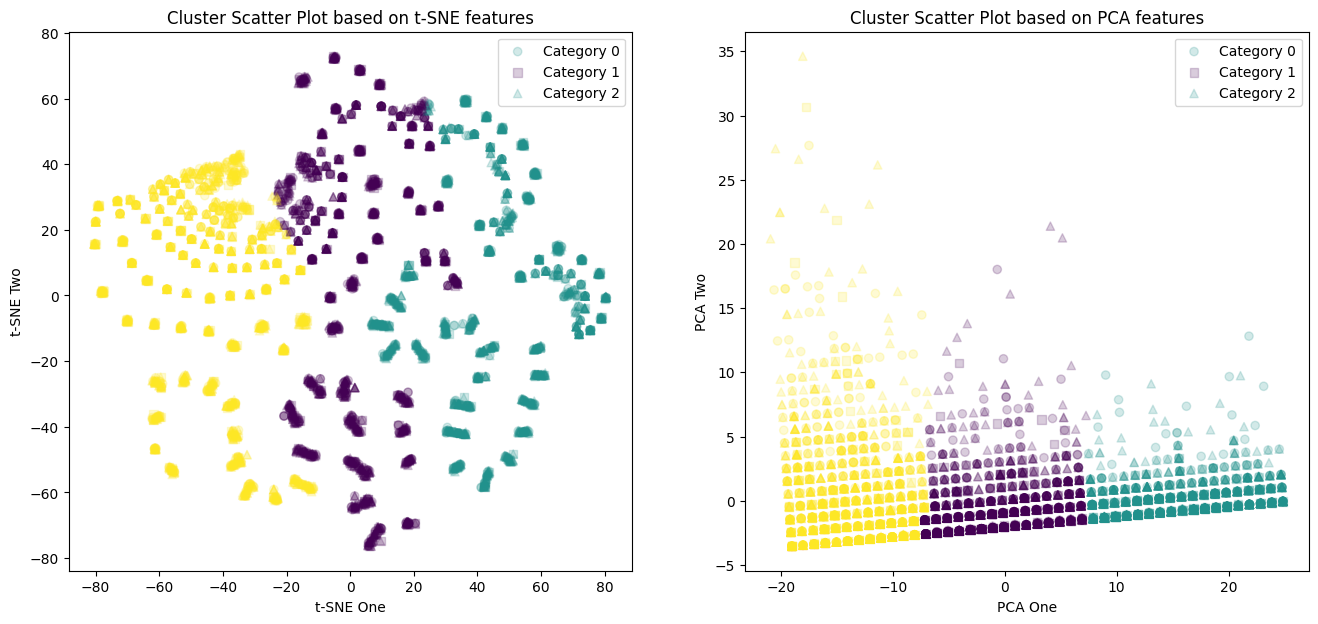

In [111]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Drop the specified columns
data_init1 = all_years.drop(columns=["Parity_Change", "Parity_Value"])

encoder1 = OneHotEncoder(handle_unknown='ignore')
encoded1 = encoder.fit_transform(data_init1[['ISO-alpha3 Code']]).toarray()

# Convert encoded features to DataFrame
encoded_21 = pd.DataFrame(encoded1, columns=encoder.get_feature_names_out(['ISO-alpha3 Code']))

# Drop original categorical column and concatenate encoded columns
data_init1 = data_init1.drop(columns=['ISO-alpha3 Code']).reset_index(drop=True)
data1 = pd.concat([data_init1, encoded_21], axis=1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data1)
data1['pca-one'] = pca_result[:, 0]
data1['pca-two'] = pca_result[:, 1]

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data1)
data1['tsne-one'] = tsne_result[:, 0]
data1['tsne-two'] = tsne_result[:, 1]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(data1.drop(["tsne-one", "tsne-two", "pca-one", "pca-two"], axis=1))

# Add the cluster labels to the dataframe
data1['Cluster'] = kmeans.labels_

# Scatter plot for clusters based on t-SNE features
# Define markers for each category
markers = {0: 'o', 1: 's', 2: '^'}

plt.figure(figsize=(16, 7))

# Scatter plot for clusters based on t-SNE features
plt.subplot(1, 2, 1)
for category in markers:
    subset = data1[y_changecat_complete == category]
    plt.scatter(subset['tsne-one'], subset['tsne-two'], c=subset['Cluster'], alpha=0.2, cmap='viridis', marker=markers[category], label=f'Category {category}')
plt.xlabel('t-SNE One')
plt.ylabel('t-SNE Two')
plt.title('Cluster Scatter Plot based on t-SNE features')
plt.legend()

# Scatter plot for clusters based on PCA features
plt.subplot(1, 2, 2)
for category in markers:
    subset = data1[y_changecat_complete == category]
    plt.scatter(subset['pca-one'], subset['pca-two'], c=subset['Cluster'], alpha=0.2, cmap='viridis', marker=markers[category], label=f'Category {category}')
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.title('Cluster Scatter Plot based on PCA features')
plt.legend()

plt.show()


In [53]:
actual_y_val = all_years[all_years["Year"] >= 2015]["Parity_Value"]
actual_y_val.reset_index(drop=True, inplace=True)
actual_y_val

0      0.681
1      0.679
2      0.676
3      0.667
4      0.672
       ...  
856    0.983
857    0.992
858    0.997
859    0.999
860    1.005
Name: Parity_Value, Length: 861, dtype: float64

In [77]:
actual_y_val[all_years[(all_years["Year"] >= 2015) & (all_years["ISO-alpha3 Code"] == "ESP")].reset_index(drop=True).index]

0    0.681
1    0.679
2    0.676
3    0.667
4    0.672
5    0.903
Name: Parity_Value, dtype: float64

,ISO-alpha3 Code,Year,Parity_Value
200,DEU,2015,0.999
201,DEU,2016,1.000
202,DEU,2017,1.003
203,DEU,2018,1.007
204,DEU,2019,1.008
205,DEU,2020,1.008
245,ESP,2015,1.016
246,ESP,2016,1.017
247,ESP,2017,1.017
248,ESP,2018,1.014


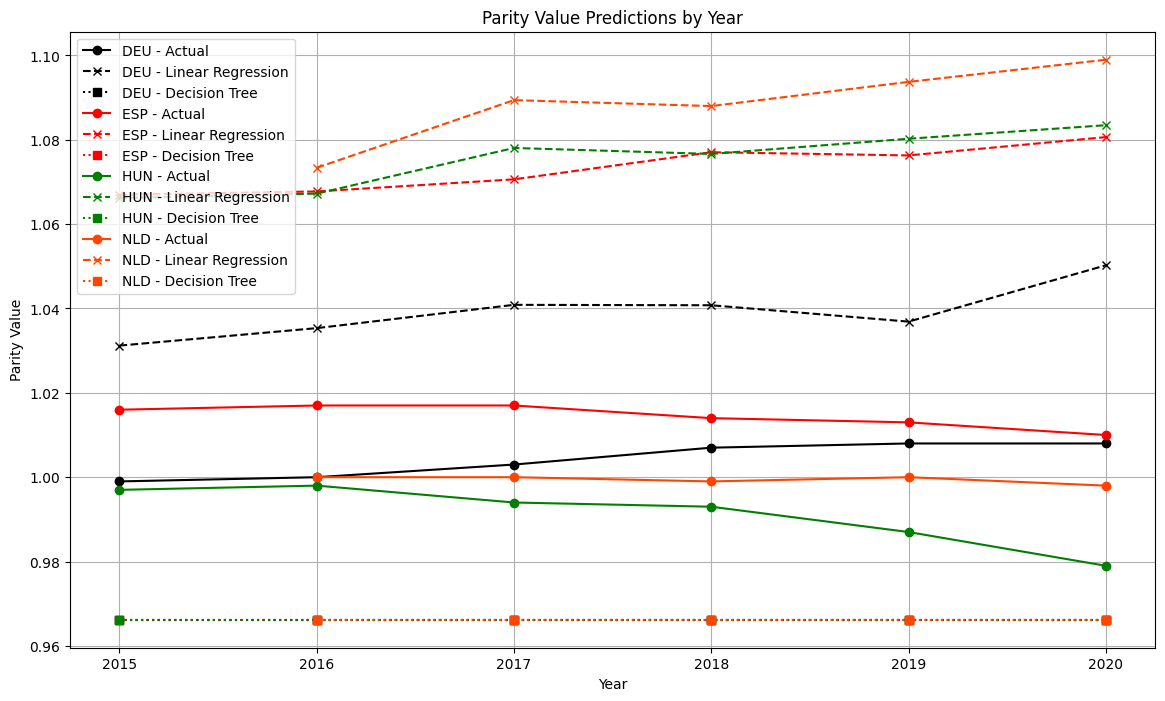

In [109]:
testcomplete = all_years[all_years["Year"] >= 2015].reset_index(drop=True)

# Filter the actual values for years above 2016
y_lin = y_pred_linear_best_val
y_tree = y_pred_tree_best_val
# y_forest = y_pred_forest_best_val

y_lin = y_lin[testcomplete[(testcomplete["Year"] >= 2015) & (testcomplete["ISO-alpha3 Code"].isin(["ESP", "HUN", "NLD", "DEU"]))][["ISO-alpha3 Code", "Year", "Parity_Value"]].index]
y_tree = y_tree[testcomplete[(testcomplete["Year"] >= 2015) & (testcomplete["ISO-alpha3 Code"].isin(["ESP", "HUN", "NLD", "DEU"]))][["ISO-alpha3 Code", "Year", "Parity_Value"]].index]
# y_forest = y_forest[testcomplete[(testcomplete["Year"] >= 2015) & (testcomplete["ISO-alpha3 Code"].isin(["ESP", "HUN", "NLD", "DEU"]))][["ISO-alpha3 Code", "Year", "Parity_Value"]].index]


# TODO add forest
plot_df = pd.concat([testcomplete[(testcomplete["Year"] >= 2015) & (testcomplete["ISO-alpha3 Code"].isin(["ESP", "HUN", "NLD", "DEU"]))][["ISO-alpha3 Code", "Year", "Parity_Value"]].reset_index(drop=True), pd.DataFrame(data={"Linear Regression": y_lin}), pd.DataFrame(data={"Decision Tree": y_tree})], axis=1)
plot_df

# Plotting the line plot
plt.figure(figsize=(14, 8))

# Group by 'ISO-alpha3 Code' and plot each group with the same color for each ISO-alpha3 Code
colors = {'ESP': 'red', 'HUN': 'green', 'NLD': 'orangered', 'DEU': 'black'}

for iso_code, group in plot_df.groupby('ISO-alpha3 Code'):
    plt.plot(group['Year'], group['Parity_Value'], label=f'{iso_code} - Actual', linestyle='-', marker='o', color=colors[iso_code])
    plt.plot(group['Year'], group['Linear Regression'], label=f'{iso_code} - Linear Regression', linestyle='--', marker='x', color=colors[iso_code])
    plt.plot(group['Year'], group['Decision Tree'], label=f'{iso_code} - Decision Tree', linestyle=':', marker='s', color=colors[iso_code])

plt.xlabel('Year')
plt.ylabel('Parity Value')
plt.title('Parity Value Predictions by Year')
plt.legend()
plt.grid(True)
plt.show()